# Formative Assessment 8
## Statistical Theory

Do a complete data analysis for PlantGrowth in {datasets} package in R using a one-way ANOVA (1B) and provide a complete report in APA style.

Null hypothesis: There is no significant difference on weight between treatment groups.

# Introduction

The means of two or more independent (unrelated) groups are compared to see if there are any statistically significant differences using the one-way analysis of variance (ANOVA). 

When comparing the means of the groups you are interested in, the one-way ANOVA determines whether any of those means differ from one another statistically substantially. It specifically examines the null hypothesis

# Null and alternative hypotheses
The null hypothesis for a one-way analysis of variance is:

$ H_0: \mu_1 = \mu_2 ... = \mu_k $

$ H_A $ : at least one group population mean is different (i.e., they are not all equal)

where k is the number of groups and µ is the group mean. However, we adopt the alternative hypothesis (HA), which states that there are at least two group means that differ from one another statistically significantly, if the one-way ANOVA yields a statistically significant result.

# Assumptions
**Assumption 1** : You have one dependent variable that is measured at the continuous level.

**Assumption 2**: You have one independent variable that consists of three or more categorical, independent groups. 

**Assumption 3**: You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or among the groups themselves. 

**Assumption 4**: There should be no significant outliers in the three or more groups of your independent variable in terms of the dependent variable.

**Assumption 5**: Your dependent variable should be approximately normally distributed for each group of the independent variable.

**Assumption 6**: You have homogeneity of variances (i.e., the variance of the dependent variable is equal in each group of your independent variable).

# Data Set and Problem
A researcher is trying to figure out how different treatment groups affect plant development. The researcher planted a number of plants and assessed their growth following various treatments in order to test this theory. In accordance with the sort of therapy they received, the plants were split into three groups: a control group (no treatment), a treatment 1 (trt1) group, and a treatment 2 (trt2) group. The group, an independent variable, was made up of these three groupings.

Each plant's weight in grams after a predetermined amount of time was used to gauge its growth. Higher weights indicated stronger growth, and this measurement measured the plant's overall growth. The name of this dependent variable was weight.

The researcher intends to know if the sort of treatment has an impact on plant development (as determined by weight). The researcher specifically wants to know if there are any notable differences in the mean weight across the three treatment groups.


# Data Analysis

First, I used R to extract/get the data from the packages in R, it will give us a csv file containing all of the data in the package and the csv will redirect to the provided directory in the code

Code in R to extract/get the data:

<code>write.csv(PlantGrowth, "C:/Users/YourUsername/Documents/PlantGrowth.csv", row.names = FALSE)</code>

Now we have the dataset, we can now proceed with the data analysis

Import necessary libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv(r"C:\Users\spike\Documents\PlantGrowth.csv")

df.head(30)

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


### Assumption 1

This is a conceptual check since it confirms the continuous nature of the dependent variable. Weight is a continuous variable with interval-level measurements.

### Assumption 2

This is a conceptual check as well. However, we can use this code to confirm the distinct categories in the group column:

In [6]:
print("Groups:", df['group'].unique())

Groups: ['ctrl' 'trt1' 'trt2']


The group variable has three independent categories: ctrl, trt1, and trt2.

### Assumption 3

Since the observations in each group of the independent variable and the groups themselves are unrelated to one another, each observation is independent of the others. To put it another way, every group stands for a separate treatment.

### Assumption 4

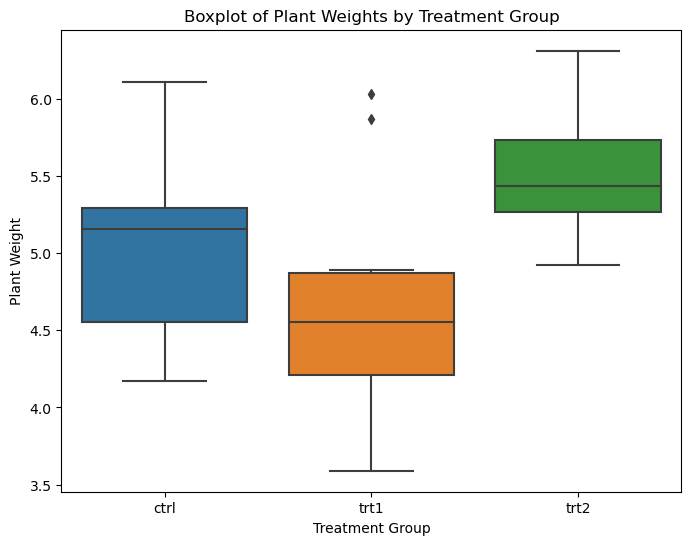

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df)
plt.title('Boxplot of Plant Weights by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Plant Weight')
plt.show()

### Interpretation

"Boxplot of Plant Weights by Treatment Group" is a boxplot that shows the distribution of plant weights in the three treatment groups (Control, Treatment 1, and Treatment 2). Below is a summary of what we see:

1. Median and Interquartile Range (IQR):
- The first quartile (Q1, 25th percentile) is the box's lower boundary, and the third quartile (Q3, 75th percentile) is the box's upper boundary. Each box indicates the interquartile range (IQR).
- The median plant weight for each treatment group is shown by the horizontal line inside each box.

2. Whiskers:
- The whiskers reach up to 1.5 times the IQR from the box. This range captures the majority of observations and reflects typical variability in the data.

3. Outliers:
- Outliers are points that are shown separately and are not part of the whiskers. We see outliers in one treatment group in this plot.
- A few plants with weights that are noticeably different from the rest of the plants in that group may be identified as outliers. These outliers may have an impact on the robustness of the test results and the assumption of normalcy in the context of an ANOVA test.

4. Group Comparison:
- There may be variations in the plant weights of the control, treatment 1, and treatment 2 groups, as indicated by the apparent disparities in the median weight and overall spread across the groups. This variance supports the requirement that an ANOVA test be used in order to evaluate these changes statistically.

Consideration for the analysis:
1. ANOVA Assumptions:
- The assumptions of normality and homogeneity of variances, in particular, may be affected by outliers. It is advised to verify these assumptions more thoroughly (for example, by applying Levene's test for homogeneity of variances and the Shapiro-Wilk test for normality).
   
2. Managing Outliers:
There are several ways you can deal with outliers:
- Leave them alone, particularly if they represent natural variability and are valid values.
- To lessen the influence of outliers, apply modifications to the data, such as square root or log transformations.
- If there are a lot of outliers or if there are significant assumptions broken, think about using a robust ANOVA or a non-parametric test (such the Kruskal-Wallis test). But since we only have 2 outliers visible, we assume that it will not greatly impact our analysis.


### Assumption 5

In [10]:
descriptive_stats = df.groupby('group')['weight'].describe()
print("Descriptive Statistics by Group:")
print(descriptive_stats)
print()

shapiro_results = {}
for group in df['group'].unique():
    stat, p_value = stats.shapiro(df[df['group'] == group]['weight'])
    shapiro_results[group] = p_value
    print(f"Shapiro-Wilk test for group '{group}': p-value = {p_value}")
    
print()

alpha = 0.05
for group, p_value in shapiro_results.items():
    if p_value < alpha:
        print(f"Group '{group}': Reject the null hypothesis - data is not normally distributed.")
    else:
        print(f"Group '{group}': Fail to reject the null hypothesis - data is normally distributed.")

Descriptive Statistics by Group:
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

Shapiro-Wilk test for group 'ctrl': p-value = 0.7474744915962219
Shapiro-Wilk test for group 'trt1': p-value = 0.451945960521698
Shapiro-Wilk test for group 'trt2': p-value = 0.5642533898353577

Group 'ctrl': Fail to reject the null hypothesis - data is normally distributed.
Group 'trt1': Fail to reject the null hypothesis - data is normally distributed.
Group 'trt2': Fail to reject the null hypothesis - data is normally distributed.


### Assumption 6

In [18]:
levene_test = stats.levene(
    df[df['group'] == 'ctrl']['weight'],
    df[df['group'] == 'trt1']['weight'],
    df[df['group'] == 'trt2']['weight']
)
LT_value = levene_test.pvalue

print(f"Levene’s Test p-value: {LT_value:.3f}")

Levene’s Test p-value: 0.341


There was homogeneity of variances of the dependent variable, as assessed by the levene's test of homogeneity of variances, p = 0.341.

# ANOVA

In [14]:
anova_results = stats.f_oneway(
    df[df['group'] == 'ctrl']['weight'],
    df[df['group'] == 'trt1']['weight'],
    df[df['group'] == 'trt2']['weight']
)

print("One-Way ANOVA Results:")
print(f"F-statistic: {anova_results.statistic:.3f}")
print(f"p-value: {anova_results.pvalue:.3f}")

alpha = 0.05
if anova_results.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference between group means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

One-Way ANOVA Results:
F-statistic: 4.846
p-value: 0.016
Reject the null hypothesis: There is a significant difference between group means.


# Post Hoc Tests

In [25]:
# Step 2: Perform one-way ANOVA to ensure there is a significant difference
model = ols('weight ~ C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n", anova_table)

# Step 3: Conduct Tukey HSD Post Hoc Test
tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)
print(tukey)

# Optional: Format the output similar to JASP output
# Display the summary table
print("Tukey HSD Post Hoc Test Summary:")
print(tukey.summary())

ANOVA Table:
             sum_sq    df         F   PR(>F)
C(group)   3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------
Tukey HSD Post Hoc Test Summary:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


# Report

A one-way ANOVA was conducted to determine if the there are any difference between the plant growth with different treatments. Treatments are classified into 3 groups, a control group (no treatment), a treatment 1 (trt1) group, and a treatment 2 (trt2) group. A visible outliers was detected but it is only 2 outliers so we assume that it will not greatly impact the data analysis,so assessed by Shapiro-Wilk Test data was normally distributed for each group (p > 0.05); and there was homogeneity of variances, as assessed by Levene's test of homogeneity of variances (p = .341). Data is presented as mean ± standard deviation. For the Descriptive Statistics, The mean plant weight is highest in Treatment 2 (5.526), followed by the control group (5.032) and Treatment 1(4.661). Treatment 1 has the highest variability in plant weights, meaning that plant weights within this group vary more widely. Treatment 2, with the lowest SD, has plant weights that are more consistently close to the group mean.

4.846 is the F-statistic. This figure shows the proportion of variance within groups to variance between group means. In general, a larger F-statistic indicates that the variability within groups is smaller than the difference between group means. This test's p-value is 0.016. If the null hypothesis (i.e., that all group means were genuinely equal) were true, this value represents the likelihood of seeing the discrepancies in group means, or something more extreme. We reject the null hypothesis because the p-value (0.016) is below the usual significance level of 0.05. This implies that at least two of the treatment groups have mean plant weights that differ statistically significantly from one another.

In order to identify which particular group means are significantly different from one another, a statistically significant ANOVA result is followed by the Tukey HSD (Honestly Significant Difference) post hoc test.

Significant Difference: There is a statistically significant difference in plant weight between Treatment 1 and Treatment 2 (p = 0.012), with Treatment 2 having a higher mean weight.

No Significant Difference: There is no statistically significant difference in plant weight between the control and Treatment 1, nor between the control and Treatment 2.

These results suggest that only the comparison between Treatment 1 and Treatment 2 shows a meaningful difference in plant weights, with plants in Treatment 2 growing more than those in Treatment 1.